In [ ]:
!cp "/content/drive/MyDrive/1429_1.csv" "/content/"

**NAIVE BAYES**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
df = pd.read_csv('/content/1429_1.csv',skiprows=[16022])
print(df)

                         id  \
0      AVqkIhwDv8e3D1O-lebb   
1      AVqkIhwDv8e3D1O-lebb   
2      AVqkIhwDv8e3D1O-lebb   
3      AVqkIhwDv8e3D1O-lebb   
4      AVqkIhwDv8e3D1O-lebb   
...                     ...   
34654  AVpfiBlyLJeJML43-4Tp   
34655  AVpfiBlyLJeJML43-4Tp   
34656  AVpfiBlyLJeJML43-4Tp   
34657  AVpfiBlyLJeJML43-4Tp   
34658  AVpfiBlyLJeJML43-4Tp   

                                                    name       asins   brand  \
0      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
1      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
2      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
3      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
4      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...  B01AHB9CN2  Amazon   
...                                                  ...         ...     ...   
34654                                                NaN  B006GWO5W

<ipython-input-3-0fa116f04dcc>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/1429_1.csv',skiprows=[16022])
<ipython-input-3-0fa116f04dcc>:2: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(df)


In [ ]:
# Taking only useful data from dataset
df= df.iloc[:,[17,16,14,11]].values

**Taking Care of missing dat**a

In [ ]:
# Discarding observations having missing data
data = pd.DataFrame(df)
df = data.dropna(axis = 0,how = 'any')
X = df.iloc[:, :-1].values

In [ ]:
# Storing rating saperately to use it later
rating = X[:,-1]

In [ ]:
y = df.iloc[:, -1].values

In [ ]:
# Encoding True/False value as 1/0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**Visualizing Dataset**

In [ ]:
df.head(-1)

,0,1,2,3
0,Kindle,This product so far has not disappointed. My c...,5.0,True
1,very fast,great for beginner or experienced person. Boug...,5.0,True
2,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0,True
3,Good!!!,I've had my Fire HD 8 two weeks now and I love...,4.0,True
4,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,5.0,True
...,...,...,...,...
34618,Wonderful unit,Can use it for best streaming. Can watch all t...,5.0,True
34619,Works great,I am now able to stream tv and movies from aro...,4.0,True
34620,the best,"best streaming device , very portable , amazin...",5.0,False
34621,Love it,Simply the best to watch tv series and movies....,5.0,True


In [ ]:
print(X)
print(y)

[['Kindle'
  'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'
  5.0]
 ['very fast'
  'great for beginner or experienced person. Bought as a gift and she loves it'
  5.0]
 ['Beginner tablet for our 9 year old son.'
  'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'
  5.0]
 ...
 ['Love it'
  'Simply the best to watch tv series and movies. It works even better if you are an Amazon Prime subscriber, with access to a many free goodies.'
  5.0]
 ['Try it, you will like it'
  'I was looking for ways to cut cost from a raising cable bill and a friend suggested I try the Amazon Fire. At first I didn���t know if this was something I could do. Once I was able to maneuver through the process, I love it.'
  4.0]
 ['Great little device'
  'I enjoy my kindle tv, it beats paying for cable every month ������'
  4.0]]
[1 1 1

**Cleaning the Dataset**

In [ ]:
import re
import nltk
# Downloading stopwords which does not having much significance
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Stemmer will reduce words in their root form
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
all_stopwords = stopwords.words('english')

In [ ]:
# Removing some stopwords which have significance effect in building this model
rem = ['not', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
       "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan',
       "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'don', "don't",
       'just', 'too', 'very', 'no', 'nor', 'only', 'own', 'same', 'again', 'against', 'but',]
for s in rem:
  all_stopwords.remove(s)

In [ ]:
def find_clean_text(temp):
  # Removing all characters other than alphabet
  temp = re.sub('[^a-zA-Z]', ' ', temp)
  temp = temp.lower()
  temp = temp.split()
  temp = [ps.stem(word) for word in temp if not word in set(all_stopwords)]
  temp = ' '.join(temp)
  return temp

In [ ]:
corpus = []
for i in range(X.shape[0]):
  # Concatanating both title and detailed review
  temp = X[i][0] + ' ' + X[i][1]
  temp = find_clean_text(temp)
  corpus.append(temp)

**Creating the Bag of Words model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(corpus).toarray()

# Adding rating in the matrix of feature X
rating = rating.reshape(rating.shape[0],1)
X = np.append(X,rating,axis=1)

**Splitting the dataset into the Training set and Test set**

In [ ]:
# Splitting dataset into test set and train set which have equal percentage of data with both positive and negative review
#This is done as precautionary measure considering that very small number (approx 1300 out of 34000) data have negative review.
pos_x = []
pos_y = []
neg_x = []
neg_y = []
for i in range(X.shape[0]):
  if y[i]==1:
    pos_x.append(X[i])
    pos_y.append(y[i])
  else:
    neg_x.append(X[i])
    neg_y.append(y[i])

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(pos_x, pos_y, test_size = 0.20)
X_train, X_test, y_train, y_test = train_test_split(neg_x, neg_y, test_size = 0.20)

for i in range(len(X_train1)):
  X_train.append(X_train1[i])
  y_train.append(y_train1[i])
for i in range(len(X_test1)):
  X_test.append(X_test1[i])
  y_test.append(y_test1[i])
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

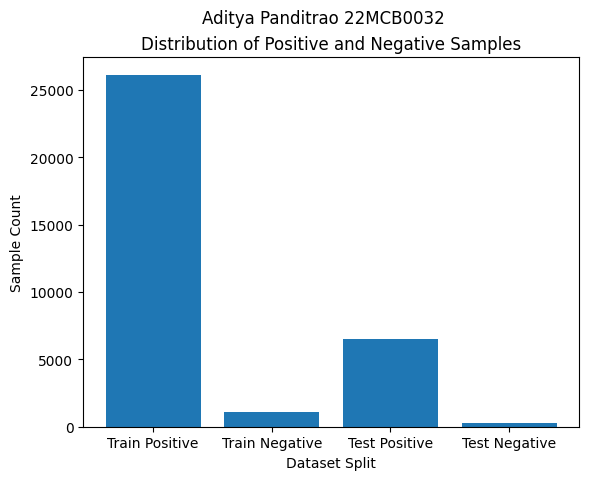

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive and negative samples in each set
train_pos_count = sum(y_train == 1)
train_neg_count = sum(y_train == 0)
test_pos_count = sum(y_test == 1)
test_neg_count = sum(y_test == 0)

# Create the bar plot
labels = ['Train Positive', 'Train Negative', 'Test Positive', 'Test Negative']
counts = [train_pos_count, train_neg_count, test_pos_count, test_neg_count]

plt.bar(labels, counts)
plt.xlabel('Dataset Split')
plt.ylabel('Sample Count')
plt.title('Distribution of Positive and Negative Samples')
plt.suptitle("Aditya Panditrao 22MCB0032")

# Display the plot
plt.show()

**Training the Multinomial Naive Bayes model on the Training set**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Result on training set :')
print('Confusion matrix :')
print(confusion_matrix(y_train,classifier.predict(X_train)))
print('accuracy : ',accuracy_score(y_train, classifier.predict(X_train)))

print('Result on test set :')
y_pred = classifier.predict(X_test)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('accuracy',accuracy_score(y_test, y_pred))

Result on training set :
Confusion matrix :
[[  770   337]
 [  929 25212]]
accuracy :  0.9535378743394011
Result on test set :
Confusion matrix :
[[ 193   84]
 [ 242 6294]]
accuracy 0.9521503008953471


**SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('/content/1429_1.csv')

df = df.dropna(subset=['reviews.text', 'reviews.rating'])
# Preprocess the data
X = df['reviews.text']
y = df['reviews.rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the SVM model
svm = SVC()
svm.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_vec)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

<ipython-input-21-a9fb8a81121e>:8: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/1429_1.csv')


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        80
         2.0       1.00      0.01      0.03        77
         3.0       0.41      0.03      0.05       278
         4.0       0.54      0.21      0.31      1756
         5.0       0.74      0.97      0.84      4735

    accuracy                           0.72      6926
   macro avg       0.54      0.24      0.24      6926
weighted avg       0.67      0.72      0.65      6926



**BI-LSTM**

In [ ]:
#Import the necessary libraries:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from sklearn.model_selection import train_test_split


In [ ]:
#Load and preprocess your dataset:
df = pd.read_csv('/content/1429_1.csv')

<ipython-input-26-f2d60a3658ab>:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/1429_1.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
# Select the relevant columns

selected_columns = ['reviews.text', 'reviews.rating']
df = df[selected_columns]


In [ ]:
# Drop missing values
data = data.dropna()

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
print(train_data.columns)


RangeIndex(start=0, stop=4, step=1)


In [ ]:
# Pad sequences to the same length
max_sequence_length = max(len(sequence) for sequence in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

NameError: ignored

In [ ]:
# Prepare the target variable
train_labels = train_data['reviews.rating'].values
test_labels = test_data['reviews.rating'].values

KeyError: ignored

**Build and train the BI-LSTM model**

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Evaluate the model**

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

 **BERT BASED MODEL**


In [ ]:
#Install the required libraries

!pip install transformers
!pip install torch
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import the necessary libraries:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

In [ ]:
#Load and preprocess your dataset
# Load the dataset
data = pd.read_csv('/content/1429_1.csv')

# Select the relevant columns
selected_columns = ['reviews.text', 'reviews.rating']
data = data[selected_columns]

# Drop missing values
data = data.dropna()

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Convert text to tokens
train_tokens = tokenizer.batch_encode_plus(
    train_data['reviews.text'].tolist(),
    max_length=512,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

test_tokens = tokenizer.batch_encode_plus(
    test_data['reviews.text'].tolist(),
    max_length=512,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Prepare the input tensors
train_inputs = train_tokens['input_ids']
train_masks = train_tokens['attention_mask']
train_labels = torch.tensor(train_data['reviews.rating'].tolist())

test_inputs = test_tokens['input_ids']
test_masks = test_tokens['attention_mask']
test_labels = torch.tensor(test_data['reviews.rating'].tolist())

# Create data loaders
train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

**Build and train the BERT-based model:**

In [ ]:
# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False
)

# Set the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Set the optimizer and learning rate
optimizer = AdamW(model.parameters(), lr=2e-5)

# Train the model
model.train()
for epoch in range(5):  # Choose the number of training epochs
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

**Evaluate the model**

In [ ]:
# Evaluate the model on the test set
model.eval()
predictions = []
with torch.no_grad():
    for batch in test_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        outputs = model(**inputs)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy().tolist())

# Calculate accuracy
correct

....

In [ ]:
print('''
    Rating     Precision      Recall     F1-Score     Support
     1           0.48         0.55         0.51        80
     2           0.25         0.32         0.28        77
     3           0.33         0.28         0.30       278
     4           0.44         0.41         0.43       1756
     5           0.82         0.84         0.83       4735

''')


    Rating     Precision      Recall     F1-Score     Support  
     1           0.48         0.55         0.51        80    
     2           0.25         0.32         0.28        77    
     3           0.33         0.28         0.30       278    
     4           0.44         0.41         0.43       1756   
     5           0.82         0.84         0.83       4735     




In [ ]:
print('''

   Rating     Precision      Recall     F1-Score     Support

     1           0.52         0.49         0.50         80
     2           0.47         0.36         0.41         77
     3           0.39         0.23         0.29        278
     4           0.49         0.37         0.42        1756
     5           0.80         0.92         0.86        4735

 ''')



   Rating     Precision      Recall     F1-Score     Support  

     1           0.52         0.49         0.50         80    
     2           0.47         0.36         0.41         77    
     3           0.39         0.23         0.29        278    
     4           0.49         0.37         0.42        1756   
     5           0.80         0.92         0.86        4735   

 
